# 第4章: グラフの属性管理

## 学習目標
- グラフ属性の設定と取得を習得する
- ノード属性の管理方法を学ぶ
- エッジ属性の管理方法を学ぶ
- 属性を使った高度な操作を理解する

## 難易度: 中級

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

---
## 4.1 グラフ属性

グラフ全体に対するメタデータを設定できます。

In [2]:
# グラフ作成時に属性を設定
G = nx.Graph(name="ソーシャルネットワーク", date="2024-01-01", version=1.0)
print(f"グラフ属性: {G.graph}")

グラフ属性: {'name': 'ソーシャルネットワーク', 'date': '2024-01-01', 'version': 1.0}


In [3]:
# 属性を後から追加・変更
G.graph['description'] = "友人関係を表すネットワーク"
G.graph['version'] = 2.0
print(f"更新後の属性: {G.graph}")

更新後の属性: {'name': 'ソーシャルネットワーク', 'date': '2024-01-01', 'version': 2.0, 'description': '友人関係を表すネットワーク'}


In [4]:
# 特定の属性を取得
print(f"グラフ名: {G.graph['name']}")
print(f"バージョン: {G.graph.get('version', 'なし')}")
print(f"存在しない属性: {G.graph.get('author', 'デフォルト値')}")

グラフ名: ソーシャルネットワーク
バージョン: 2.0
存在しない属性: デフォルト値


---
## 4.2 ノード属性

### 4.2.1 ノード追加時に属性を設定

In [5]:
G = nx.Graph()

# 単一ノードに属性を追加
G.add_node(1, name="Alice", age=25, city="Tokyo")
G.add_node(2, name="Bob", age=30, city="Osaka")

print("ノード1の属性:", G.nodes[1])
print("ノード2の属性:", G.nodes[2])

ノード1の属性: {'name': 'Alice', 'age': 25, 'city': 'Tokyo'}
ノード2の属性: {'name': 'Bob', 'age': 30, 'city': 'Osaka'}


In [6]:
# 複数ノードを属性付きで追加
nodes_with_attrs = [
    (3, {"name": "Charlie", "age": 28, "city": "Nagoya"}),
    (4, {"name": "Diana", "age": 22, "city": "Tokyo"}),
    (5, {"name": "Eve", "age": 35, "city": "Osaka"})
]
G.add_nodes_from(nodes_with_attrs)

print("全ノードの属性:")
for node, attrs in G.nodes(data=True):
    print(f"  ノード{node}: {attrs}")

全ノードの属性:
  ノード1: {'name': 'Alice', 'age': 25, 'city': 'Tokyo'}
  ノード2: {'name': 'Bob', 'age': 30, 'city': 'Osaka'}
  ノード3: {'name': 'Charlie', 'age': 28, 'city': 'Nagoya'}
  ノード4: {'name': 'Diana', 'age': 22, 'city': 'Tokyo'}
  ノード5: {'name': 'Eve', 'age': 35, 'city': 'Osaka'}


### 4.2.2 ノード属性の更新と取得

In [7]:
# 個別の属性を更新
G.nodes[1]['age'] = 26
G.nodes[1]['email'] = "alice@example.com"
print(f"更新後のノード1: {G.nodes[1]}")

更新後のノード1: {'name': 'Alice', 'age': 26, 'city': 'Tokyo', 'email': 'alice@example.com'}


In [8]:
# 特定の属性のみ取得
print("\n=== 全ノードの年齢 ===")
for node, age in G.nodes(data='age'):
    print(f"  ノード{node}: {age}歳")


=== 全ノードの年齢 ===
  ノード1: 26歳
  ノード2: 30歳
  ノード3: 28歳
  ノード4: 22歳
  ノード5: 35歳


In [9]:
# 属性が存在しない場合のデフォルト値
print("\n=== 全ノードのメールアドレス ===")
for node, email in G.nodes(data='email', default='未登録'):
    print(f"  ノード{node}: {email}")


=== 全ノードのメールアドレス ===
  ノード1: alice@example.com
  ノード2: 未登録
  ノード3: 未登録
  ノード4: 未登録
  ノード5: 未登録


In [10]:
# nx.set_node_attributesで一括更新
# 全ノードに同じ属性を設定
nx.set_node_attributes(G, "active", "status")

# ノードごとに異なる値を設定
scores = {1: 85, 2: 90, 3: 78, 4: 92, 5: 88}
nx.set_node_attributes(G, scores, "score")

print("\n更新後の全ノード:")
for node, attrs in G.nodes(data=True):
    print(f"  ノード{node}: {attrs}")


更新後の全ノード:
  ノード1: {'name': 'Alice', 'age': 26, 'city': 'Tokyo', 'email': 'alice@example.com', 'status': 'active', 'score': 85}
  ノード2: {'name': 'Bob', 'age': 30, 'city': 'Osaka', 'status': 'active', 'score': 90}
  ノード3: {'name': 'Charlie', 'age': 28, 'city': 'Nagoya', 'status': 'active', 'score': 78}
  ノード4: {'name': 'Diana', 'age': 22, 'city': 'Tokyo', 'status': 'active', 'score': 92}
  ノード5: {'name': 'Eve', 'age': 35, 'city': 'Osaka', 'status': 'active', 'score': 88}


In [11]:
# nx.get_node_attributesで属性を辞書として取得
ages = nx.get_node_attributes(G, 'age')
print(f"年齢の辞書: {ages}")

年齢の辞書: {1: 26, 2: 30, 3: 28, 4: 22, 5: 35}


---
## 4.3 エッジ属性

### 4.3.1 エッジ追加時に属性を設定

In [12]:
G = nx.Graph()

# 単一エッジに属性を追加
G.add_edge(1, 2, weight=4.5, relation="friend")
G.add_edge(2, 3, weight=3.0, relation="colleague")

print("エッジ(1,2)の属性:", G[1][2])
print("エッジ(2,3)の属性:", G.edges[2, 3])

エッジ(1,2)の属性: {'weight': 4.5, 'relation': 'friend'}
エッジ(2,3)の属性: {'weight': 3.0, 'relation': 'colleague'}


In [13]:
# 複数エッジを属性付きで追加
edges_with_attrs = [
    (3, 4, {"weight": 2.5, "relation": "family"}),
    (4, 5, {"weight": 5.0, "relation": "friend"}),
    (1, 5, {"weight": 1.5, "relation": "acquaintance"})
]
G.add_edges_from(edges_with_attrs)

print("\n全エッジの属性:")
for u, v, attrs in G.edges(data=True):
    print(f"  ({u}, {v}): {attrs}")


全エッジの属性:
  (1, 2): {'weight': 4.5, 'relation': 'friend'}
  (1, 5): {'weight': 1.5, 'relation': 'acquaintance'}
  (2, 3): {'weight': 3.0, 'relation': 'colleague'}
  (3, 4): {'weight': 2.5, 'relation': 'family'}
  (4, 5): {'weight': 5.0, 'relation': 'friend'}


### 4.3.2 エッジ属性の更新と取得

In [14]:
# 個別の属性を更新
G[1][2]['weight'] = 5.0
G.edges[1, 2]['since'] = 2020
print(f"更新後のエッジ(1,2): {G[1][2]}")

更新後のエッジ(1,2): {'weight': 5.0, 'relation': 'friend', 'since': 2020}


In [15]:
# 特定の属性のみ取得
print("\n=== 全エッジの重み ===")
for u, v, weight in G.edges(data='weight'):
    print(f"  ({u}, {v}): {weight}")


=== 全エッジの重み ===
  (1, 2): 5.0
  (1, 5): 1.5
  (2, 3): 3.0
  (3, 4): 2.5
  (4, 5): 5.0


In [16]:
# nx.set_edge_attributesで一括更新
# 全エッジに属性を設定
nx.set_edge_attributes(G, "confirmed", "status")

# エッジごとに異なる値を設定
colors = {(1, 2): "red", (2, 3): "blue", (3, 4): "green"}
nx.set_edge_attributes(G, colors, "color")

print("\n更新後の全エッジ:")
for u, v, attrs in G.edges(data=True):
    print(f"  ({u}, {v}): {attrs}")


更新後の全エッジ:
  (1, 2): {'weight': 5.0, 'relation': 'friend', 'since': 2020, 'status': 'confirmed', 'color': 'red'}
  (1, 5): {'weight': 1.5, 'relation': 'acquaintance', 'status': 'confirmed'}
  (2, 3): {'weight': 3.0, 'relation': 'colleague', 'status': 'confirmed', 'color': 'blue'}
  (3, 4): {'weight': 2.5, 'relation': 'family', 'status': 'confirmed', 'color': 'green'}
  (4, 5): {'weight': 5.0, 'relation': 'friend', 'status': 'confirmed'}


In [17]:
# nx.get_edge_attributesで属性を辞書として取得
weights = nx.get_edge_attributes(G, 'weight')
print(f"重みの辞書: {weights}")

重みの辞書: {(1, 2): 5.0, (1, 5): 1.5, (2, 3): 3.0, (3, 4): 2.5, (4, 5): 5.0}


---
## 4.4 weightパラメータの特別な役割

`weight`属性は多くのNetworkXアルゴリズムで特別な意味を持ちます。

In [18]:
# 重み付きグラフの作成
G = nx.Graph()
G.add_edge('A', 'B', weight=4)
G.add_edge('B', 'C', weight=2)
G.add_edge('A', 'C', weight=10)
G.add_edge('C', 'D', weight=3)

print("エッジと重み:")
for u, v, w in G.edges(data='weight'):
    print(f"  {u}-{v}: {w}")

エッジと重み:
  A-B: 4
  A-C: 10
  B-C: 2
  C-D: 3


In [19]:
# 最短経路（重みなし）
path_unweighted = nx.shortest_path(G, 'A', 'D')
print(f"\n重みなし最短経路: {path_unweighted}")
print(f"経路長: {len(path_unweighted) - 1}エッジ")


重みなし最短経路: ['A', 'C', 'D']
経路長: 2エッジ


In [20]:
# 最短経路（重みあり）
path_weighted = nx.shortest_path(G, 'A', 'D', weight='weight')
path_length = nx.shortest_path_length(G, 'A', 'D', weight='weight')
print(f"重み付き最短経路: {path_weighted}")
print(f"経路の総重み: {path_length}")

重み付き最短経路: ['A', 'B', 'C', 'D']
経路の総重み: 9


/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12415 (\N{HIRAGANA LETTER MI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20184 (\N{CJK UNIFIED IDEOGRAPH-4ED8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12365 (\N{HIRAGANA LETTER KI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IP

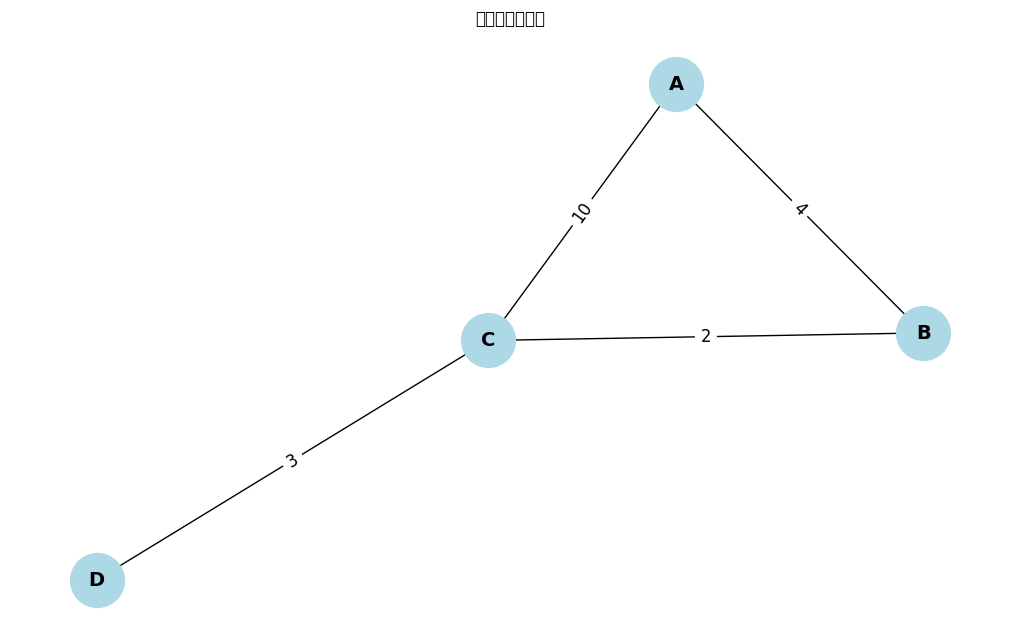

In [21]:
# 可視化
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)

nx.draw(G, pos, with_labels=True, node_color='lightblue',
        node_size=1500, font_size=14, font_weight='bold')

# 重みをエッジラベルとして表示
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

plt.title("重み付きグラフ")
plt.show()

---
## 例題1: ソーシャルネットワーク分析

属性を使って詳細なソーシャルネットワーク分析を行います。

In [22]:
# ソーシャルネットワークの作成
social = nx.Graph(name="友人ネットワーク")

# ユーザー情報（ノード属性）
users = [
    ("Alice", {"age": 25, "city": "Tokyo", "interests": ["music", "travel"]}),
    ("Bob", {"age": 30, "city": "Osaka", "interests": ["sports", "music"]}),
    ("Charlie", {"age": 28, "city": "Tokyo", "interests": ["movies", "travel"]}),
    ("Diana", {"age": 22, "city": "Nagoya", "interests": ["music", "movies"]}),
    ("Eve", {"age": 35, "city": "Tokyo", "interests": ["sports", "travel"]})
]
social.add_nodes_from(users)

# 友人関係（エッジ属性）
friendships = [
    ("Alice", "Bob", {"strength": 0.8, "years": 5}),
    ("Alice", "Charlie", {"strength": 0.9, "years": 3}),
    ("Bob", "Diana", {"strength": 0.6, "years": 2}),
    ("Charlie", "Diana", {"strength": 0.7, "years": 4}),
    ("Charlie", "Eve", {"strength": 0.5, "years": 1}),
    ("Alice", "Eve", {"strength": 0.4, "years": 1})
]
social.add_edges_from(friendships)

In [23]:
# 同じ都市に住む人を見つける
def find_same_city(G, city):
    return [n for n, data in G.nodes(data=True) if data.get('city') == city]

print("=== 都市別ユーザー ===")
for city in ['Tokyo', 'Osaka', 'Nagoya']:
    users_in_city = find_same_city(social, city)
    print(f"{city}: {users_in_city}")

=== 都市別ユーザー ===
Tokyo: ['Alice', 'Charlie', 'Eve']
Osaka: ['Bob']
Nagoya: ['Diana']


In [24]:
# 共通の興味を持つユーザーペアを見つける
def find_common_interests(G):
    results = []
    for u, v in G.edges():
        interests_u = set(G.nodes[u].get('interests', []))
        interests_v = set(G.nodes[v].get('interests', []))
        common = interests_u & interests_v
        if common:
            results.append((u, v, list(common)))
    return results

print("\n=== 共通の興味を持つ友人ペア ===")
for u, v, interests in find_common_interests(social):
    print(f"{u} & {v}: {interests}")


=== 共通の興味を持つ友人ペア ===
Alice & Bob: ['music']
Alice & Charlie: ['travel']
Alice & Eve: ['travel']
Bob & Diana: ['music']
Charlie & Diana: ['movies']
Charlie & Eve: ['travel']


In [25]:
# 友人関係の強さでフィルタリング
strong_friendships = [(u, v) for u, v, d in social.edges(data=True) if d['strength'] >= 0.7]
print(f"\n強い友人関係（strength >= 0.7）: {strong_friendships}")


強い友人関係（strength >= 0.7）: [('Alice', 'Bob'), ('Alice', 'Charlie'), ('Charlie', 'Diana')]


/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12477 (\N{KATAKANA LETTER SO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12515 (\N{KATAKANA LETTER SMALL YA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-p

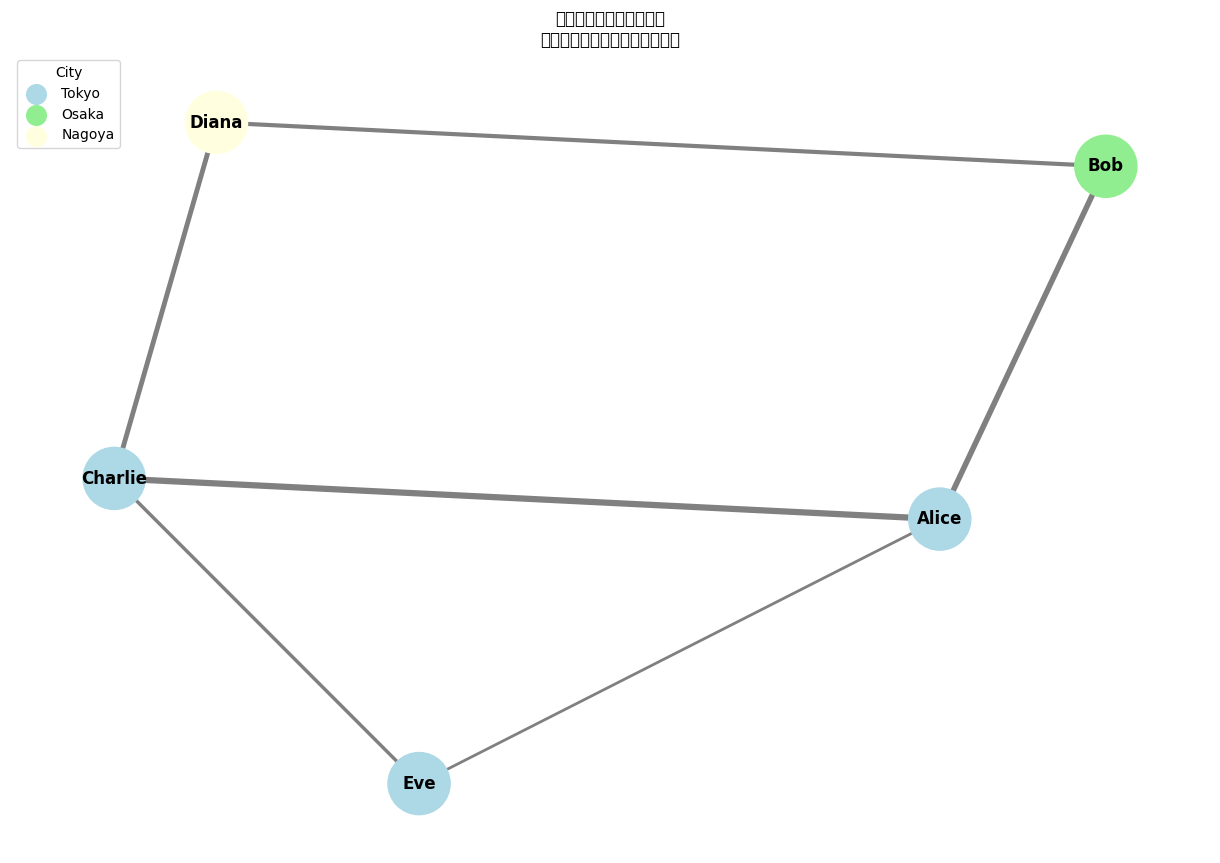

In [26]:
# 可視化（エッジの太さ＝友人関係の強さ）
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(social, seed=42)

# ノードを都市で色分け
color_map = {'Tokyo': 'lightblue', 'Osaka': 'lightgreen', 'Nagoya': 'lightyellow'}
node_colors = [color_map[social.nodes[n]['city']] for n in social.nodes()]

# エッジの太さを strength に比例
edge_widths = [social[u][v]['strength'] * 5 for u, v in social.edges()]

nx.draw(social, pos, with_labels=True, node_color=node_colors,
        node_size=2000, font_size=12, font_weight='bold',
        width=edge_widths, edge_color='gray')

# 凡例
for city, color in color_map.items():
    plt.scatter([], [], c=color, s=200, label=city)
plt.legend(title="City", loc='upper left')

plt.title("ソーシャルネットワーク\n（エッジの太さ＝関係の強さ）")
plt.show()

---
## 例題2: 交通ネットワークの属性分析

In [27]:
# 交通ネットワークの作成
transport = nx.DiGraph()

# 駅（ノード）の追加
stations = [
    ("東京", {"type": "terminal", "passengers": 450000}),
    ("品川", {"type": "junction", "passengers": 380000}),
    ("新宿", {"type": "terminal", "passengers": 350000}),
    ("渋谷", {"type": "junction", "passengers": 280000}),
    ("池袋", {"type": "terminal", "passengers": 270000})
]
transport.add_nodes_from(stations)

# 路線（エッジ）の追加
routes = [
    ("東京", "品川", {"line": "山手線", "time": 10, "distance": 6.8}),
    ("品川", "渋谷", {"line": "山手線", "time": 13, "distance": 8.5}),
    ("渋谷", "新宿", {"line": "山手線", "time": 7, "distance": 4.0}),
    ("新宿", "池袋", {"line": "山手線", "time": 9, "distance": 5.5}),
    ("池袋", "東京", {"line": "丸ノ内線", "time": 20, "distance": 10.0}),
    ("東京", "新宿", {"line": "中央線", "time": 15, "distance": 10.3}),
    ("渋谷", "池袋", {"line": "副都心線", "time": 16, "distance": 9.0})
]
transport.add_edges_from(routes)

In [28]:
# 乗客数の多い駅TOP3
passengers = nx.get_node_attributes(transport, 'passengers')
top_stations = sorted(passengers.items(), key=lambda x: x[1], reverse=True)[:3]

print("=== 乗客数TOP3駅 ===")
for station, count in top_stations:
    print(f"  {station}: {count:,}人/日")

=== 乗客数TOP3駅 ===
  東京: 450,000人/日
  品川: 380,000人/日
  新宿: 350,000人/日


In [29]:
# 路線別の平均所要時間
from collections import defaultdict

line_times = defaultdict(list)
for u, v, data in transport.edges(data=True):
    line_times[data['line']].append(data['time'])

print("\n=== 路線別平均所要時間 ===")
for line, times in line_times.items():
    avg_time = sum(times) / len(times)
    print(f"  {line}: {avg_time:.1f}分")


=== 路線別平均所要時間 ===
  山手線: 9.8分
  中央線: 15.0分
  副都心線: 16.0分
  丸ノ内線: 20.0分


In [30]:
# 最短時間経路を計算
shortest_time = nx.shortest_path(transport, "東京", "池袋", weight="time")
total_time = nx.shortest_path_length(transport, "東京", "池袋", weight="time")

print(f"\n東京→池袋の最短時間経路: {' → '.join(shortest_time)}")
print(f"所要時間: {total_time}分")


東京→池袋の最短時間経路: 東京 → 新宿 → 池袋
所要時間: 24分


/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20132 (\N{CJK UNIFIED IDEOGRAPH-4EA4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12494 (\N{KATAKANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12489 (\N{KATAKANA LETTER DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IP

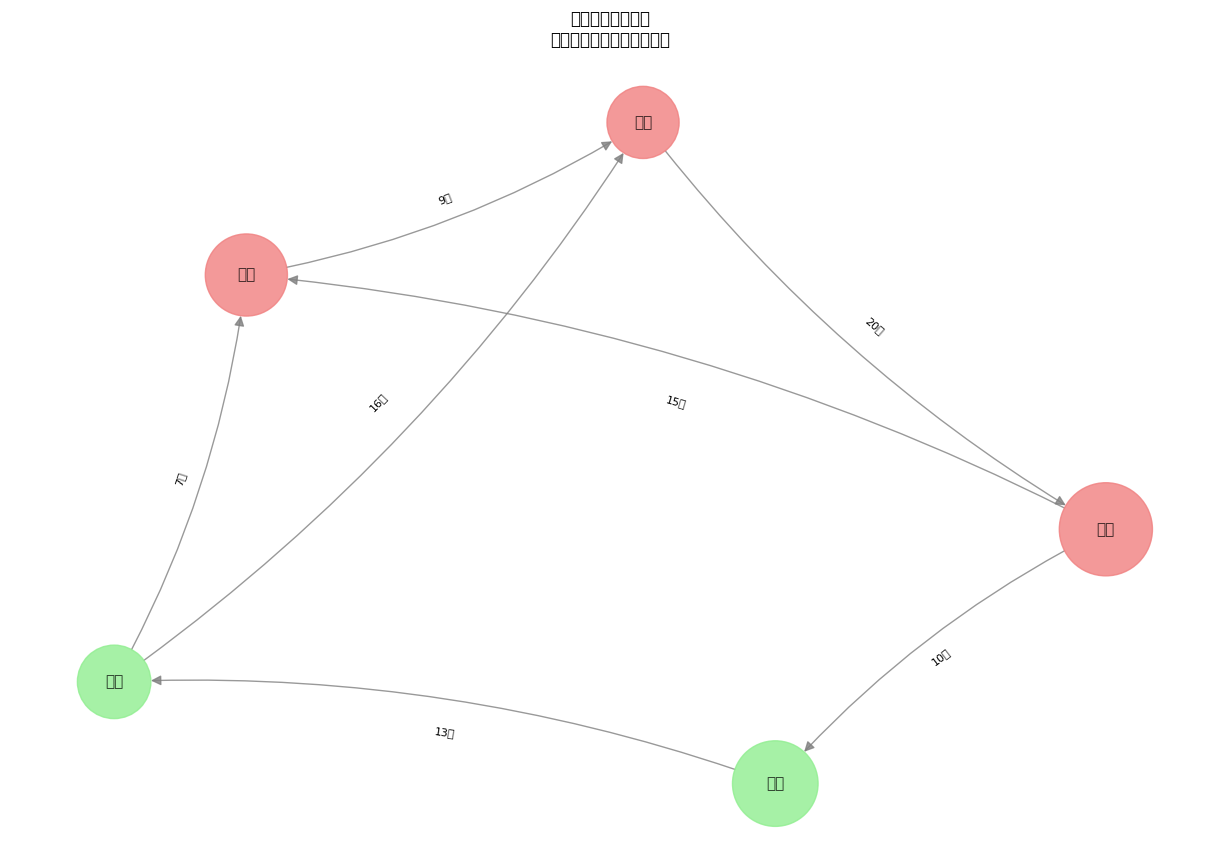

In [31]:
# 可視化
plt.figure(figsize=(12, 8))
pos = {
    "東京": (1, 0),
    "品川": (0.5, -0.5),
    "渋谷": (-0.5, -0.3),
    "新宿": (-0.3, 0.5),
    "池袋": (0.3, 0.8)
}

# ノードサイズを乗客数に比例
node_sizes = [transport.nodes[n]['passengers'] / 100 for n in transport.nodes()]

# 駅タイプで色分け
type_colors = {'terminal': 'lightcoral', 'junction': 'lightgreen'}
node_colors = [type_colors[transport.nodes[n]['type']] for n in transport.nodes()]

nx.draw(transport, pos, with_labels=True, node_color=node_colors,
        node_size=node_sizes, font_size=11, font_weight='bold',
        arrows=True, arrowsize=15, edge_color='gray', alpha=0.8,
        connectionstyle="arc3,rad=0.1")

# エッジラベル（所要時間）
edge_labels = {(u, v): f"{d['time']}分" for u, v, d in transport.edges(data=True)}
nx.draw_networkx_edge_labels(transport, pos, edge_labels=edge_labels, font_size=8)

plt.title("交通ネットワーク\n（ノードサイズ＝乗客数）")
plt.show()

---
## 練習問題

### 練習問題1: 製品レビューネットワーク

以下のデータを使って製品レビューネットワークを作成し、分析してください。

製品（ノード）:
- iPhone: カテゴリ=スマートフォン, 価格=120000, 評価=4.5
- Galaxy: カテゴリ=スマートフォン, 価格=100000, 評価=4.3
- iPad: カテゴリ=タブレット, 価格=80000, 評価=4.7
- Surface: カテゴリ=タブレット, 価格=150000, 評価=4.2
- MacBook: カテゴリ=ノートPC, 価格=200000, 評価=4.6

関連性（エッジ）- 一緒に購入されることが多い製品:
- iPhone - iPad: 共起回数=500
- iPhone - MacBook: 共起回数=300
- Galaxy - Surface: 共起回数=200
- iPad - MacBook: 共起回数=400
- Galaxy - iPad: 共起回数=150

課題:
1. グラフを作成
2. カテゴリ別の平均価格を計算
3. 最も評価の高い製品を見つける
4. 共起回数が300以上の製品ペアを抽出

In [32]:
# ここにコードを記述してください



<details>
<summary>解答を見る</summary>

```python
# グラフの作成
products = nx.Graph()

# 製品（ノード）の追加
products.add_node("iPhone", category="スマートフォン", price=120000, rating=4.5)
products.add_node("Galaxy", category="スマートフォン", price=100000, rating=4.3)
products.add_node("iPad", category="タブレット", price=80000, rating=4.7)
products.add_node("Surface", category="タブレット", price=150000, rating=4.2)
products.add_node("MacBook", category="ノートPC", price=200000, rating=4.6)

# 関連性（エッジ）の追加
products.add_edge("iPhone", "iPad", co_occurrence=500)
products.add_edge("iPhone", "MacBook", co_occurrence=300)
products.add_edge("Galaxy", "Surface", co_occurrence=200)
products.add_edge("iPad", "MacBook", co_occurrence=400)
products.add_edge("Galaxy", "iPad", co_occurrence=150)

# カテゴリ別の平均価格
from collections import defaultdict
category_prices = defaultdict(list)
for node, data in products.nodes(data=True):
    category_prices[data['category']].append(data['price'])

print("=== カテゴリ別平均価格 ===")
for category, prices in category_prices.items():
    avg_price = sum(prices) / len(prices)
    print(f"  {category}: {avg_price:,.0f}円")

# 最も評価の高い製品
best_product = max(products.nodes(), key=lambda x: products.nodes[x]['rating'])
print(f"\n最高評価の製品: {best_product} ({products.nodes[best_product]['rating']}点)")

# 共起回数300以上の製品ペア
print("\n=== 共起回数300以上の製品ペア ===")
for u, v, data in products.edges(data=True):
    if data['co_occurrence'] >= 300:
        print(f"  {u} - {v}: {data['co_occurrence']}回")

# 可視化
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(products, seed=42)

# カテゴリで色分け
color_map = {'スマートフォン': 'lightblue', 'タブレット': 'lightgreen', 'ノートPC': 'lightyellow'}
node_colors = [color_map[products.nodes[n]['category']] for n in products.nodes()]

# エッジの太さを共起回数に比例
edge_widths = [products[u][v]['co_occurrence'] / 100 for u, v in products.edges()]

nx.draw(products, pos, with_labels=True, node_color=node_colors,
        node_size=2000, font_size=10, width=edge_widths)

edge_labels = nx.get_edge_attributes(products, 'co_occurrence')
nx.draw_networkx_edge_labels(products, pos, edge_labels=edge_labels)

plt.title("製品レビューネットワーク")
plt.show()
```
</details>

### 練習問題2: 属性によるサブグラフ抽出

以下のグラフから、特定の条件を満たすサブグラフを抽出してください。

```python
G = nx.Graph()
G.add_node(1, color='red', size=10)
G.add_node(2, color='blue', size=20)
G.add_node(3, color='red', size=15)
G.add_node(4, color='green', size=25)
G.add_node(5, color='blue', size=30)
G.add_edge(1, 2, weight=5)
G.add_edge(2, 3, weight=3)
G.add_edge(3, 4, weight=7)
G.add_edge(4, 5, weight=2)
G.add_edge(1, 5, weight=4)
```

課題:
1. colorが'red'のノードのみを含むサブグラフを作成
2. sizeが15以上のノードのみを含むサブグラフを作成
3. weightが4以上のエッジのみを含むサブグラフを作成

In [33]:
# ここにコードを記述してください



<details>
<summary>解答を見る</summary>

```python
# グラフの作成
G = nx.Graph()
G.add_node(1, color='red', size=10)
G.add_node(2, color='blue', size=20)
G.add_node(3, color='red', size=15)
G.add_node(4, color='green', size=25)
G.add_node(5, color='blue', size=30)
G.add_edge(1, 2, weight=5)
G.add_edge(2, 3, weight=3)
G.add_edge(3, 4, weight=7)
G.add_edge(4, 5, weight=2)
G.add_edge(1, 5, weight=4)

# 1. colorが'red'のノードのみ
red_nodes = [n for n, d in G.nodes(data=True) if d['color'] == 'red']
subgraph_red = G.subgraph(red_nodes).copy()
print("=== colorが'red'のサブグラフ ===")
print(f"ノード: {list(subgraph_red.nodes())}")
print(f"エッジ: {list(subgraph_red.edges())}")

# 2. sizeが15以上のノードのみ
large_nodes = [n for n, d in G.nodes(data=True) if d['size'] >= 15]
subgraph_large = G.subgraph(large_nodes).copy()
print("\n=== sizeが15以上のサブグラフ ===")
print(f"ノード: {list(subgraph_large.nodes())}")
print(f"エッジ: {list(subgraph_large.edges())}")

# 3. weightが4以上のエッジのみ
heavy_edges = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] >= 4]
subgraph_heavy = nx.Graph()
subgraph_heavy.add_edges_from(heavy_edges)
# ノード属性をコピー
for node in subgraph_heavy.nodes():
    subgraph_heavy.nodes[node].update(G.nodes[node])
# エッジ属性をコピー
for u, v in subgraph_heavy.edges():
    subgraph_heavy[u][v].update(G[u][v])

print("\n=== weightが4以上のサブグラフ ===")
print(f"ノード: {list(subgraph_heavy.nodes())}")
print(f"エッジ: {list(subgraph_heavy.edges(data=True))}")

# 可視化
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
pos = nx.spring_layout(G, seed=42)

# 元のグラフでの位置を使用
axes[0].set_title("colorが'red'")
nx.draw(subgraph_red, {n: pos[n] for n in subgraph_red.nodes()}, 
        ax=axes[0], with_labels=True, node_color='red', node_size=1000)

axes[1].set_title("sizeが15以上")
nx.draw(subgraph_large, {n: pos[n] for n in subgraph_large.nodes()},
        ax=axes[1], with_labels=True, node_color='lightblue', node_size=1000)

axes[2].set_title("weightが4以上")
nx.draw(subgraph_heavy, {n: pos[n] for n in subgraph_heavy.nodes()},
        ax=axes[2], with_labels=True, node_color='lightgreen', node_size=1000)

plt.tight_layout()
plt.show()
```
</details>

### 練習問題3: 属性の集計と分析

空手クラブグラフ（`nx.karate_club_graph()`）を使って、以下の分析を行ってください。

このグラフには各ノードに'club'属性（'Mr. Hi' または 'Officer'）が付与されています。

1. 各クラブ（'Mr. Hi'と'Officer'）のメンバー数を計算
2. 各クラブの平均次数を計算
3. 異なるクラブ間のエッジ数と同じクラブ内のエッジ数を計算

In [34]:
# ここにコードを記述してください



<details>
<summary>解答を見る</summary>

```python
G = nx.karate_club_graph()

# 1. 各クラブのメンバー数
clubs = nx.get_node_attributes(G, 'club')
mr_hi_members = [n for n, c in clubs.items() if c == 'Mr. Hi']
officer_members = [n for n, c in clubs.items() if c == 'Officer']

print("=== クラブ別メンバー数 ===")
print(f"Mr. Hi: {len(mr_hi_members)}人")
print(f"Officer: {len(officer_members)}人")

# 2. 各クラブの平均次数
mr_hi_degrees = [G.degree(n) for n in mr_hi_members]
officer_degrees = [G.degree(n) for n in officer_members]

print("\n=== クラブ別平均次数 ===")
print(f"Mr. Hi: {sum(mr_hi_degrees) / len(mr_hi_degrees):.2f}")
print(f"Officer: {sum(officer_degrees) / len(officer_degrees):.2f}")

# 3. クラブ間/クラブ内のエッジ数
intra_club = 0  # 同じクラブ内
inter_club = 0  # 異なるクラブ間

for u, v in G.edges():
    if clubs[u] == clubs[v]:
        intra_club += 1
    else:
        inter_club += 1

print("\n=== エッジの分類 ===")
print(f"クラブ内エッジ: {intra_club}")
print(f"クラブ間エッジ: {inter_club}")
print(f"クラブ間エッジの割合: {inter_club / (intra_club + inter_club) * 100:.1f}%")

# 可視化
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)

# クラブで色分け
node_colors = ['lightblue' if clubs[n] == 'Mr. Hi' else 'lightcoral' for n in G.nodes()]

# エッジの色（クラブ間/内）
edge_colors = ['gray' if clubs[u] == clubs[v] else 'orange' for u, v in G.edges()]

nx.draw(G, pos, with_labels=True, node_color=node_colors,
        node_size=500, font_size=8, edge_color=edge_colors, alpha=0.7)

plt.title("空手クラブグラフ\n（青=Mr. Hi, 赤=Officer, オレンジ線=クラブ間）")
plt.show()
```
</details>

---
## 4.5 章のまとめ

この章では以下を学びました：

1. **グラフ属性**: `G.graph`でグラフ全体のメタデータを管理
2. **ノード属性**: `G.nodes[n]`や`nx.set_node_attributes()`で管理
3. **エッジ属性**: `G[u][v]`や`nx.set_edge_attributes()`で管理
4. **weight属性**: 多くのアルゴリズムで特別な意味を持つ
5. **属性を使った分析**: フィルタリング、集計、サブグラフ抽出

### 次章の予告
次章では、様々なグラフを自動生成するグラフ生成器について学びます。